In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.max_rows = 2000
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


SSE: 11362.86553902214
model 1 - slope: 3.854183810417272 intercept: -16.23577552797958
model 2 - slope: 3.9324087591240864 intercept: -17.579094890510937


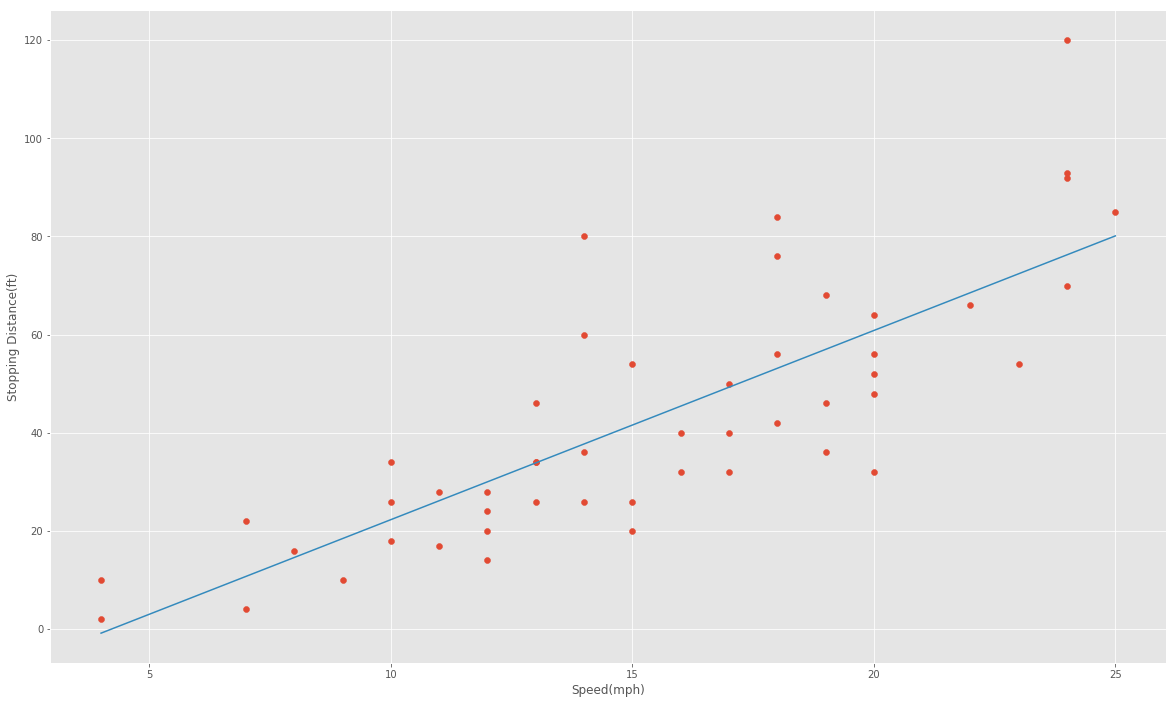

In [4]:
#Initiate variables
x, y = np.array(df.speed), np.array(df.dist)  
a = 0.005
m = 0
b = 0
n = len(x)
max_iter = 5000

#Loop through iterations and calculate gradient descent
for i in range(0, max_iter):
    gradient_m = sum([(1/n * x[i] * (b + m * x[i] - y[i])) for i in range(0,n)])
    gradient_b = sum([(1/n * (b + m * x[i] - y[i])) for i in range(0,n)])
    m = m - a * gradient_m
    b = b - a * gradient_b

#Calculate predictions and print out model results
y_hat = [b + m*x[i] for i in range(0,50)]
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
print('SSE: ' + str(sum([(((b + m * x[i]) - y[i]) ** 2) for i in range (0,n)])))
print(('model 1 - slope: %s intercept: %s') % (str(m), str(b)))
print (('model 2 - slope: %s intercept: %s') % (slope, intercept))

#Plot with regression
plt.figure(figsize = (20, 12))
plt.scatter(x, y)
plt.plot(x, y_hat, color ='C1')
plt.xlabel('Speed(mph)')
plt.ylabel('Stopping Distance(ft)')
plt.show()